In [4]:
from landmark_detection.pipeline import Pipeline_Yolo_CVNet_SG
import os

In [2]:
pipeline = Pipeline_Yolo_CVNet_SG(
        detector_file = "yolov8n-oiv7.pt",
        extractor_onnx_file = "cvnet-sg-v1.onnx",
        pipeline_onnx_file = "pipeline-yolo-cvnet-sg-v1.onnx",
        image_dim = (640, 640),
        allowed_classes = [41,68,70,74,87,95,113,144,150,158,164,165,193,205,212,224,257,
                                      298,310,335,351,354,390,393,401,403,439,442,457,466,489,510,512,
                                      514,524,530,531,543,546,554,565,573,580,587,588,591],
        score_thresh = 0.10,
        iou_thresh = 0.45,
        scales = [0.7071, 1.0, 1.4142],
        mean = [0.485, 0.456, 0.406],
        std  = [0.229, 0.224, 0.225],
        rgem_pr = 2.5,
        rgem_size = 5,
        gem_p = 4.6,
        sgem_ps = 10.0,
        sgem_infinity = False,
        eps = 1e-8  
)

Creando versión ONNX del detector
Ultralytics 8.3.146  Python-3.11.11 torch-2.7.0+cpu CPU (Intel Core(TM) i5-9300HF 2.40GHz)
YOLOv8n summary (fused): 72 layers, 3,492,527 parameters, 0 gradients, 10.5 GFLOPs

PyTorch: starting from 'C:\Users\rdiaz\Documents\GitHub\landmark-detection-with-retrieval\landmark_detection\models\yolov8n-oiv7.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 605, 8400) (6.9 MB)

ONNX: starting export with onnx 1.17.0 opset 16...
ONNX: slimming with onnxslim 0.1.54...
ONNX: export success  3.2s, saved as 'C:\Users\rdiaz\Documents\GitHub\landmark-detection-with-retrieval\landmark_detection\models\yolov8n-oiv7.onnx' (13.5 MB)

Export complete (4.3s)
Results saved to C:\Users\rdiaz\Documents\GitHub\landmark-detection-with-retrieval\landmark_detection\models
Predict:         yolo predict task=detect model=C:\Users\rdiaz\Documents\GitHub\landmark-detection-with-retrieval\landmark_detection\models\yolov8n-oiv7.onnx imgsz=640  
Validate:        yolo 

In [22]:
import matplotlib.pyplot as plt
import cv2
import yaml

def show_image(img_path):   
    # Carga de imagen
    img_bgr = cv2.imread(img_path)
    if img_bgr is None:
        raise FileNotFoundError(f"No se encontró la imagen en {IMAGE_PATH}")
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # Mostrar la imagen original
    plt.figure(figsize=(6,6))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

def show_bboxes(img_path, class_names_path, boxes, cls, scores):
    # Carga de imagen
    img_bgr = cv2.imread(img_path)
    if img_bgr is None:
        raise FileNotFoundError(f"No se encontró la imagen en {IMAGE_PATH}")
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # Carga las clases
    class_names = load_names_from_yaml(CLASS_NAMES_PATH)
    
    print(f"Encontradas {len(boxes)} cajas:")
    for i in range(len(boxes)):
        x1,y1,x2,y2 = boxes[i]
        class_name = class_names[cls[i]]
        print(f"  Clase {cls[i]} {class_name} @ {scores[i]:.2f} → [{x1:.1f},{y1:.1f},{x2:.1f},{y2:.1f}]")
        
    plt.figure(figsize=(6,6))
    plt.imshow(img_rgb)
    ax = plt.gca()
    
    for (x1,y1,x2,y2), cls, sc in zip(boxes, cls, scores):
        rect = plt.Rectangle(
            (x1, y1),
            x2 - x1,
            y2 - y1,
            fill=False, linewidth=2, edgecolor='red'
        )
        ax.add_patch(rect)
        class_name = class_names[cls]
        ax.text(
            x1, y1 - 4,
            f"{class_name}:{sc:.2f}",
            color='white', fontsize=9,
            bbox=dict(facecolor='red', alpha=0.5)
        )
    
    plt.axis('off')
    plt.show()

def load_names_from_yaml(file_path):
    """
    Carga un archivo YAML con la estructura:
    
    names:
      0: Accordion
      1: Adhesive tape
      2: Aircraft
      3: Airplane
      4: Alarm clock
      5: Alpaca
    
    y devuelve una lista de nombres ordenados según la clave numérica.
    """
    with open(file_path, 'r', encoding='utf-8') as f:
        data = yaml.safe_load(f)
    
    names_dict = data.get('names', {})
    # Ordenar los elementos por la clave (convirtiendo a entero si hace falta)
    sorted_items = sorted(names_dict.items(), key=lambda item: int(item[0]))
    
    # Construir la lista de valores
    names_list = [value for _, value in sorted_items]
    return names_list

In [17]:
# Paths
IMAGE_PATH = os.path.join("test_images", "test.jpg")
CLASS_NAMES_PATH = os.path.join("oiv7.yaml")

In [21]:
load_names_from_yaml(CLASS_NAMES_PATH)

['Accordion',
 'Adhesive tape',
 'Aircraft',
 'Airplane',
 'Alarm clock',
 'Alpaca',
 'Ambulance',
 'Animal',
 'Ant',
 'Antelope',
 'Apple',
 'Armadillo',
 'Artichoke',
 'Auto part',
 'Axe',
 'Backpack',
 'Bagel',
 'Baked goods',
 'Balance beam',
 'Ball',
 'Balloon',
 'Banana',
 'Band-aid',
 'Banjo',
 'Barge',
 'Barrel',
 'Baseball bat',
 'Baseball glove',
 'Bat (Animal)',
 'Bathroom accessory',
 'Bathroom cabinet',
 'Bathtub',
 'Beaker',
 'Bear',
 'Bed',
 'Bee',
 'Beehive',
 'Beer',
 'Beetle',
 'Bell pepper',
 'Belt',
 'Bench',
 'Bicycle',
 'Bicycle helmet',
 'Bicycle wheel',
 'Bidet',
 'Billboard',
 'Billiard table',
 'Binoculars',
 'Bird',
 'Blender',
 'Blue jay',
 'Boat',
 'Bomb',
 'Book',
 'Bookcase',
 'Boot',
 'Bottle',
 'Bottle opener',
 'Bow and arrow',
 'Bowl',
 'Bowling equipment',
 'Box',
 'Boy',
 'Brassiere',
 'Bread',
 'Briefcase',
 'Broccoli',
 'Bronze sculpture',
 'Brown bear',
 'Building',
 'Bull',
 'Burrito',
 'Bus',
 'Bust',
 'Butterfly',
 'Cabbage',
 'Cabinetry',
 'C

In [25]:
# Ejecutar pipeline
results = pipeline.run(IMAGE_PATH)
results

[array([[          0,           0,         639,         639],
        [     2.0309,       238.7,      635.17,      585.75],
        [     354.21,      241.35,      406.43,       373.2],
        [     127.61,      334.49,      205.89,      395.76],
        [     533.38,      177.76,      627.12,       442.1]], dtype=float32),
 array([          1,     0.21503,     0.16431,     0.14933,     0.11897], dtype=float32),
 array([  0, 257, 546, 257, 546]),
 array([[   0.010576,    0.017447,   0.0038731, ...,    0.016022,    0.019857,    0.011175],
        [  0.0042523,    0.031169,   0.0084759, ...,    0.010717,    0.018144,      0.0149],
        [   0.020416,   0.0067652,    0.012238, ...,    0.026342,    0.011236,   0.0022186],
        [  0.0058663,    0.079122,     0.01575, ...,    0.013712,    0.032906,   0.0054238],
        [   0.020339,   0.0049178,    0.025916, ...,   0.0045935,   0.0046325,   0.0085385]], dtype=float32)]

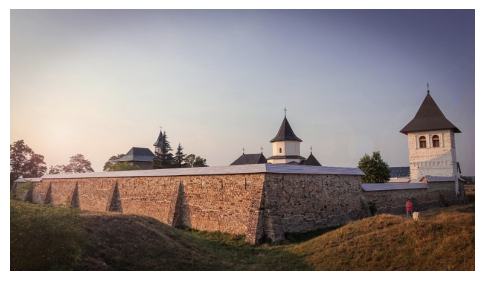

In [14]:
show_image(IMAGE_PATH)

Encontradas 5 cajas:
  Clase 0 Accordion @ 1.00 → [0.0,0.0,639.0,639.0]
  Clase 257 House @ 0.22 → [2.0,238.7,635.2,585.8]
  Clase 546 Tower @ 0.16 → [354.2,241.3,406.4,373.2]
  Clase 257 House @ 0.15 → [127.6,334.5,205.9,395.8]
  Clase 546 Tower @ 0.12 → [533.4,177.8,627.1,442.1]


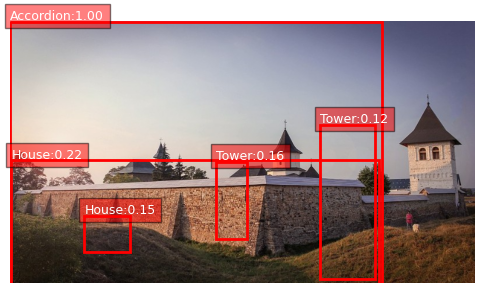

In [24]:
show_bboxes(IMAGE_PATH, CLASS_NAMES_PATH, results[0], results[2], results[1])